# Technical Skills Assessment - Nkwa 
#### Task: Building a predictive model for the Pima Indians Diabetes dataset.
The aim of this model is to identify individuals at risk of developing Diabetes.
#### Goal: Develop a classification model that predicts diabetes diagnosis based on patient characteristics with an:
- Accuracy: > 80%
- Precision: > 85%
#### Technologies: Pandas, Scikit-learn

##### Step 1: Understanding the data
*Note:* All individuals in this dataset are females.

The *Outcome* column which is our target variable has 2 values. 
- 1 meaning _diabetes_
- 2 meaning _no diabetes_

This dataset contains the following features:
- Pregnancies: representing the number of times a patient has been pregnant
- Glucose: glucose level/concentration in patient's body
- Blood Pressure: blood pressure level
- Skin Thickness: skin thickness (how thick their skin is)
- Insulin: The level/concentration of insulin in the patient's body
- BMI: Body Mass Index (weight to height ratio) 
- Diabetes Pedigree Function: Indicates patient's family history of diabetes, measuring how likely it is for a person to inherit diabetes based on family data.
    - *Low values ie <= 0.5* means the individual has little to no immediate family history of diabetes.
    -  *Medium values ie 0.6 <= DFP <= 1.0* suggests a moderate family history
    - *High values >= 1.1* suggests a strong family history of diabetes
- Age: the patient's age

In [3]:
import pandas as pd

df = pd.read_csv('pima_indians_diabetes_dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


##### Step 2: Preparing the data

- *Checking for and handling missing values if any*
There are no missing values present. 
    - *Handling outliers*: Following the point above, there are some columns that contain entries of *0* which makes no sense for this context. They include _Glucose, BloodPressure, SkinThickness, Insulin,_ and _BMI_. It suggests that they were used as placeholders for missing values but this however introduces outliers into the dataset, as having a skin thickness of 0 for example is physiologically impossible. 
        For each column in question, I will be replacing the 0-values with the median values. This is because when extreme values exist in a dataset, the middle value is unaffected by these extreme values in turn preventing skewed results.

- *Scaling the data*
This ensures that each feature would contribute equally to the model by putting them on a similar scale. For this, I would be using Z-score standardization (standard scaler) where value ranges are normalized using a mean of 0 and a standard deviation of 1.

    The target column is not a required feature needed for standardizing the data. Hence, I will dropping it.


- *Splitting data into test and training sets.*
I will be splitting 80-20 meaning 80% for the training data and 20% for the test data 


- *Exploratory Data Analysis*
Here, I decided to look at the relationships all the individual features have with the Outcome just to have an overview. Generally, it suggests that there is an association between individuals with high-feature values (individually for Pregnancies, Glucose etc) and diabetes. However, the relationship between the individual features and the Outcome is non-linear. Leveraging on this, I will be using Decision Trees classification algorithm for my model.

In [8]:
# Checking for missing values
print(df.isnull().values.any())
df.isnull().sum()

False


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# Verifying that columns in question contain 0 as placeholders for where data was not available
columns_in_question = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for column in columns_in_question:
    zero_count = (df[column] == 0).sum()
    print(zero_count, column)

5 Glucose
35 BloodPressure
227 SkinThickness
374 Insulin
11 BMI


In [10]:
# Replacing zero values with mean values
for column in columns_in_question:
    df[column] = df[column].replace(0, df[column].median())

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


In [11]:
# Verifying that all 0-values have been replaced
columns_in_question = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for column in columns_in_question:
    zero_count = (df[column] == 0).sum()
    print(zero_count, column)

0 Glucose
0 BloodPressure
0 SkinThickness
0 Insulin
0 BMI


In [12]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

X = df.drop(columns="Outcome")
Y = df["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16724016,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85155088,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33183808,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.90976751,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34215536,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29849289,
        -0.47378505, -0.87137393]])

In [54]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.1, random_state=0)

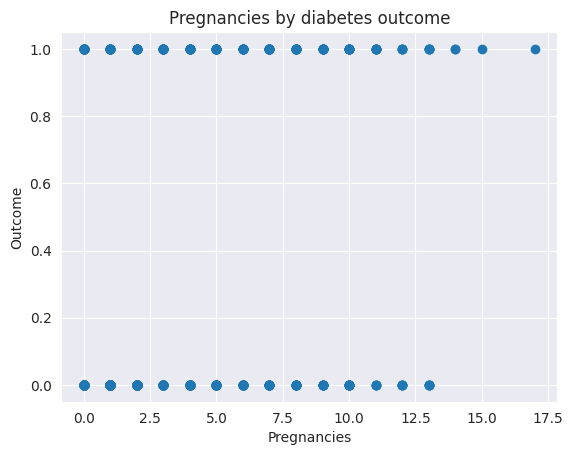

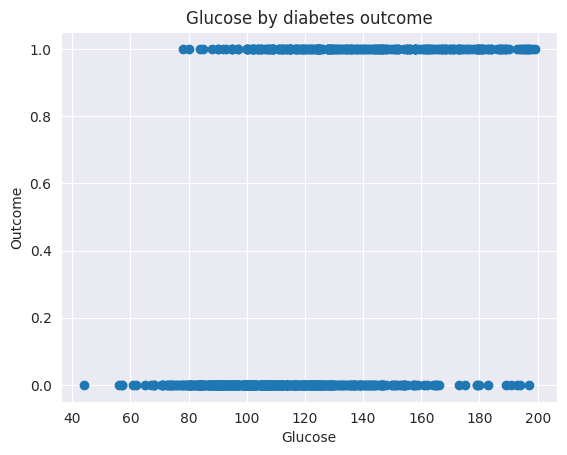

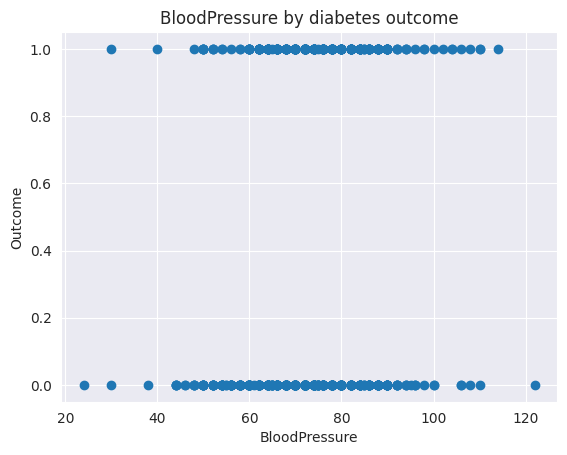

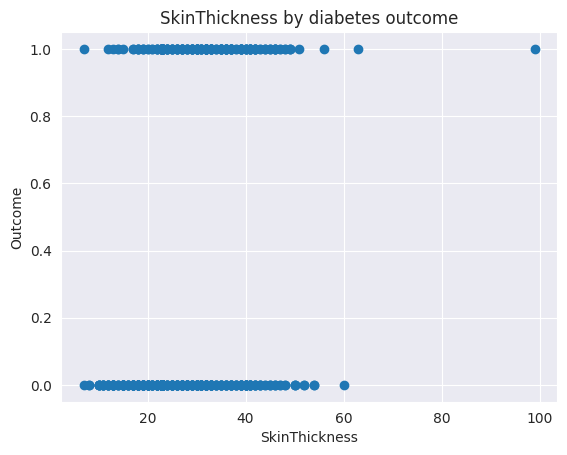

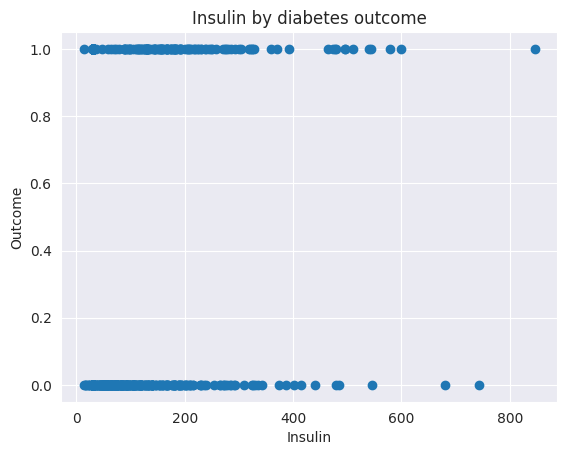

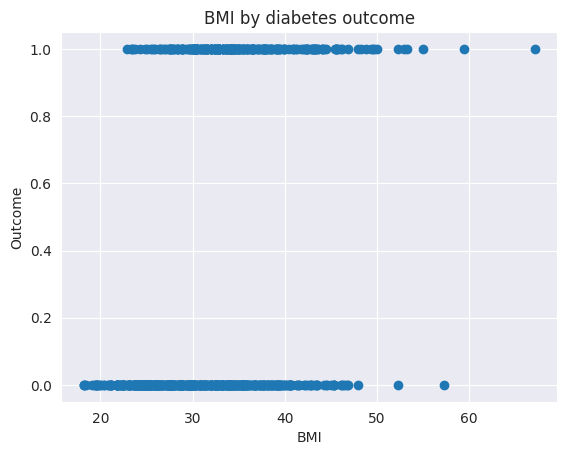

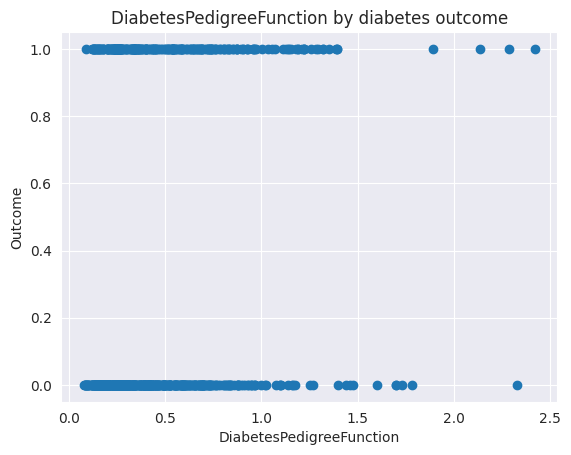

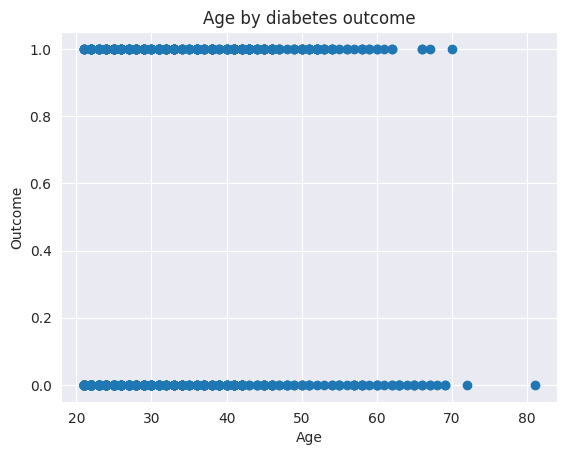

In [14]:
# Visualize data for better understanding
import matplotlib.pyplot as plt

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for feature in features:
    plt.scatter(df[feature], df["Outcome"])
    plt.xlabel(feature)
    plt.ylabel('Outcome')
    plt.title(f"{feature} by diabetes outcome")
    plt.show()

##### Step 3: Training the model
Using the Decision Tree Classifier

In [15]:
# Train the model 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [17]:
# Make predictions using test data
Y_pred = model.predict(X_test)

In [18]:
Y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0])

In [19]:
Y_test

661    1
122    0
113    0
14     1
529    0
      ..
253    0
622    0
235    1
351    0
672    0
Name: Outcome, Length: 77, dtype: int64

In [20]:
# Model evaluation

accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_report0 = classification_report(Y_test, Y_pred)

In [21]:
print(f"Accuracy: {accuracy}\n"
      f"Confusion matrix:\n{conf_matrix}\n"
      f"------------------------------------\n"
      f"TP: {conf_matrix[0,0]}\n"
      f"FP: {conf_matrix[0,1]}\n"
      f"FN: {conf_matrix[1,0]}\n"
      f"TN: {conf_matrix[1,1]}\n"
      f"Classification report:\n{classification_report0}")

Accuracy: 0.6753246753246753
Confusion matrix:
[[36 15]
 [10 16]]
------------------------------------
TP: 36
FP: 15
FN: 10
TN: 16
Classification report:
              precision    recall  f1-score   support

           0       0.78      0.71      0.74        51
           1       0.52      0.62      0.56        26

    accuracy                           0.68        77
   macro avg       0.65      0.66      0.65        77
weighted avg       0.69      0.68      0.68        77



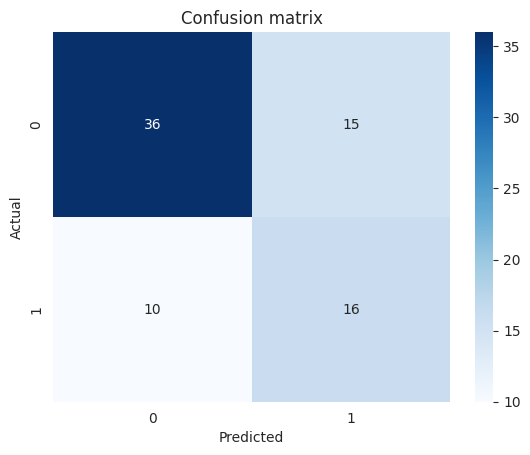

In [22]:
# Visualizing the confusion matrix
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

After evaluating the model, it is seen to have:
- Accuracy: 68%
- Precision: 69%

In summary, the model's performance is not ideal. To increase this, I will do the following:
 - Increase training data (from 80% to 90%) because the model performs exceptionally well on the training data but poorly (<70%) on the test data. This means it is likely overfitting due to insufficient data.
- Tune its hyperparameters in order to achieve optimal performance by finding the best configurations and in turn preventing overfitting despite increasing training data size.

In [24]:
Y_pred_train = model.predict(X_train)
train_accuracy = accuracy_score(Y_train, Y_pred_train)

In [26]:
print(f"Train Accuracy: {train_accuracy}")
print(f"Classification report:\n{classification_report(Y_train, Y_pred_train)}")

Train Accuracy: 1.0
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       449
           1       1.00      1.00      1.00       242

    accuracy                           1.00       691
   macro avg       1.00      1.00      1.00       691
weighted avg       1.00      1.00      1.00       691



*Tuning Hyper-parameters and retraining model*

In [55]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), parameter_grid, cv=5)
grid_search.fit(X_train, Y_train)

best_model = grid_search.best_estimator_

In [56]:
# Retraining model after grid search
best_model.fit(X_train, Y_train)
Y_pred_new = best_model.predict(X_test)

In [68]:
# Evaluating performance of new model
conf_matrix1 = confusion_matrix(Y_test, Y_pred_new)
classification_report1 = classification_report(Y_test, Y_pred_new)

In [70]:
print(f"confusion matrix:\n{conf_matrix1}\n"
      f"Classification report:\n{classification_report1}\n")

confusion matrix:
[[44  7]
 [ 8 18]]
Classification report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        51
           1       0.72      0.69      0.71        26

    accuracy                           0.81        77
   macro avg       0.78      0.78      0.78        77
weighted avg       0.80      0.81      0.80        77




In [63]:
# Verifying dataset balance
nd = (df["Outcome"] == 0).sum() # non-diabetic instances
d = (df["Outcome"] == 1).sum() # diabetic instances
print(nd, d)

500 268


##### Remarks

- Model Accuracy: 81%
- Model Precision: 80%

*Confusion Matrix Interpretation*
- True Positives (TP): 18 (Diabetic instances correctly predicted as diabetic)
- True Negatives (TN): 44 (Non-diabetic instances correctly predicted as non-diabetic)
- False Positives (FP): 7 (Non-diabetic instances incorrectly predicted as diabetic)
- False Negatives (FN): 8 (Diabetic instances incorrectly predicted as non-diabetic)

The target of this model was to achieve an accuracy of above 80%, and a precision above 85%. The condition for accuracy was met but not precision. This was due to class imbalance.

As seen above, the dataset contains 768 rows in total with 500 of these rows being non-diabetic instances, creating an imbalance where non-diabetic cases represent a majority. 

The model may not be learning enough about diabetic cases because they are less frequent (roughly 35%). This could lead to the model becoming biased toward the majority class affecting its ability to generalize. To address this issue, I recommend:
- oversampling to increase the number of instances of the minority class or
- undersampling to decrease the number of instances of the majority class

##### Using the model
I will be using the model on fresh data to determine whether some set of people have diabetes or not

1. *Individuals with diabetes*

| Pregnancies | Glucose | Blood Pressure | Skin Thickness | Insulin | BMI  | Diabetes Pedigree Function | Age | Outcome |
|-------------|---------|----------------|----------------|---------|------|----------------------------|-----|---------|
| 2           | 190     | 70             | 30             | 300     | 35.5 | 0.5                        | 45  | 1       |
| 4           | 150     | 85             | 40             | 250     | 33.0 | 0.7                        | 50  | 1       |
| 3           | 200     | 78             | 35             | 400     | 37.5 | 0.8                        | 60  | 1       |
| 5           | 210     | 90             | 45             | 500     | 39.0 | 0.9                        | 55  | 1       |


2. *Individuals without diabetes*

| Pregnancies | Glucose | Blood Pressure | Skin Thickness | Insulin | BMI  | Diabetes Pedigree Function | Age | Outcome |
|-------------|---------|----------------|----------------|---------|------|----------------------------|-----|---------|
| 1           | 100     | 70             | 15             | 85      | 25.6 | 0.2                        | 28  | 0       |
| 2           | 105     | 80             | 20             | 90      | 26.1 | 0.3                        | 30  | 0       |
| 0           | 110     | 75             | 18             | 95      | 24.5 | 0.4                        | 29  | 0       |
| 1           | 115     | 85             | 22             | 100     | 27.3 | 0.5                        | 32  | 0       |



In [73]:
new_patients = pd.DataFrame({
    'Pregnancies': [2, 4, 3, 5, 1, 2, 0, 1],
    'Glucose': [190, 150, 200, 210, 100, 105, 110, 115],
    'BloodPressure': [70, 85, 78, 90, 70, 80, 75, 85],
    'SkinThickness': [30, 40, 35, 45, 15, 20, 18, 22],
    'Insulin': [300, 250, 400, 500, 85, 90, 95, 100],
    'BMI': [35.5, 33.0, 37.5, 39.0, 25.6, 26.1, 24.5, 27.3],
    'DiabetesPedigreeFunction': [0.5, 0.7, 0.8, 0.9, 0.2, 0.3, 0.4, 0.5],
    'Age': [45, 50, 60, 55, 28, 30, 29, 32]
})

new_patients

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,190,70,30,300,35.5,0.5,45
1,4,150,85,40,250,33.0,0.7,50
2,3,200,78,35,400,37.5,0.8,60
3,5,210,90,45,500,39.0,0.9,55
4,1,100,70,15,85,25.6,0.2,28
5,2,105,80,20,90,26.1,0.3,30
6,0,110,75,18,95,24.5,0.4,29
7,1,115,85,22,100,27.3,0.5,32


In [77]:
new_patients_scaled = scaler.fit_transform(new_patients)

In [79]:
predictions = best_model.predict(new_patients_scaled)
predictions

array([1, 1, 1, 1, 0, 0, 0, 0])

All cases were correctly predicted.